# Getting the (wrong) picture from the data

Gabriele Degola

Scientific Methodology and Experimental Evaluation - 2021/22

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***

## Kindergarten

Load data:

In [2]:
data = [[1.36,  0.24,  0.22,  0.11,  1.25,  0.24,  0.35,  0.24,  1.6,  0.63,  0.68,  0.0,  1.44,  1.86,  3.47,  0.58,  0.0,  0.82,  2.75,  3.14,  1.58,  2.83,  1.92,  0.83,  2.47,  1.13,  1.72,  0.61,  0.35,  1.11,  1.24,  2.36,  0.5],
        [2.07,  3.6,  2.57,  4.29,  5.67,  1.67,  2.43,  4.72,  7.67,  3.83,  5.13,  2.31,  1.0,  3.74,  6.64,  3.39,  2.36,  6.75,  5.13,  8.0,  7.08,  6.01,  6.25,  2.61,  3.61,  2.67,  5.24,  1.56,  1.89,  4.06,  3.11,  4.0,  2.89],
        [7.63,  5.79,  7.38,  8.5,  5.75,  4.83,  5.38,  7.75,  7.54,  8.38,  7.5,  6.17,  5.68,  7.25,  7.54,  5.64,  6.46,  7.5,  8.75,  9.0,  7.25,  7.42,  6.58,  8.25,  7.46,  7.21,  7.5,  8.17,  6.96,  8.0,  6.92,  5.71,  7.0],
        [1.57,  1.36,  1.25,  2.81,  0.86,  0.47,  0.35,  1.81,  1.63,  1.36,  0.35,  1.75,  0.35,  2.58,  1.58,  1.67,  0.6,  1.63,  1.06,  0.0,  2.17,  0.25,  0.0,  2.67,  2.33,  1.13,  1.22,  1.33,  1.0,  0.83],
        [2.26,  3.68,  6.26,  3.88,  6.54,  5.25,  6.0,  6.67,  4.96,  2.57,  1.64,  5.83,  6.42,  6.88,  4.46,  1.94,  5.5,  1.71,  3.33,  2.28,  5.67,  5.32,  1.56,  2.32,  4.17,  6.18,  4.32,  6.5,  3.0,  2.67],
        [4.42,  6.63,  6.88,  7.17,  7.0,  7.33,  7.63,  6.54,  8.54,  5.21,  4.46,  7.0,  6.5,  6.0,  7.25,  5.47,  7.63,  3.83,  4.92,  5.96,  6.33,  7.13,  4.61,  4.13,  7.0,  7.25,  7.88,  8.5,  5.21,  7.0]]

The question to which we want to ask is: is there any significant difference between the scores obtained by the students that followed the classic or the alternative pedagogy? Does the alternative pedagogy have an impact on the obtained scores?

Nice graphs can be obtained through the [seaborn](http://seaborn.pydata.org/) library. Data is therefore reorganized in a pandas DataFrame, in the format expected by seaborn (each line containing a single score and information about the section and group of the student).

In [3]:
tmp = []
for i, d in enumerate(data):
    if i < 3:
        group = "Classical"
    else:
        group = "Alternative"
    
    if i % 3 == 0:
        section = "Petite"
    elif i % 3 == 1:
        section = "Moyenne"
    else:
        section = "Grande"
    
    for j, v in enumerate(d):
        tmp.append([j, v, group, section])
df = pd.DataFrame(tmp, columns=["Subject ID", "Score", "Group", "Section"])
df.head()

,Subject ID,Score,Group,Section
0,0,1.36,Classical,Petite
1,1,0.24,Classical,Petite
2,2,0.22,Classical,Petite
3,3,0.11,Classical,Petite
4,4,1.25,Classical,Petite


A first idea of the trend of the student scores can be obtained through a scatter plot, plotting the scores for each section. To analyze the difference between the two pedagogies, two scatter plots are produced.

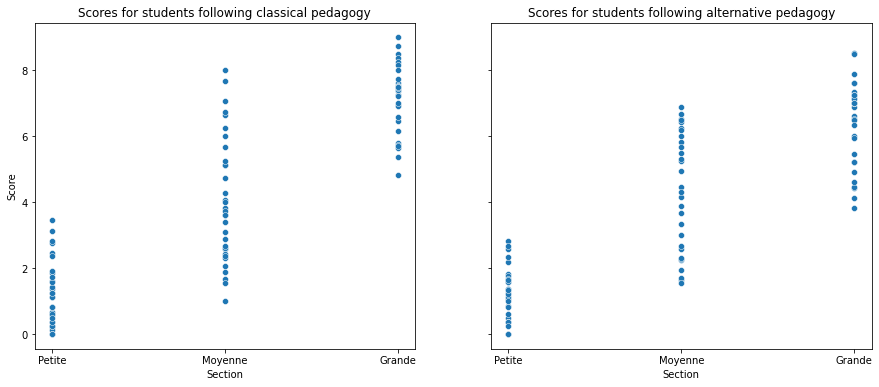

In [4]:
_, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.scatterplot(data=df[df['Group'] == "Classical"], x="Section", y="Score", ax=axs[0])
axs[0].set_title("Scores for students following classical pedagogy")
sns.scatterplot(data=df[df['Group'] == "Alternative"], x="Section", y="Score", ax=axs[1])
axs[1].set_title("Scores for students following alternative pedagogy")
plt.show()

The scores obtained by the two groups of students look quite similar for the same sections, maybe slightly lower for students in the *grande* section following alternative pedagogy. The variance in the groups is also remarkable, especially in the *moyenne* for classical pedagogy.

The trend can be better visualized through lineplots, comparing the average evolution of students belonging to the same group. The standard deviation of the scores for the same group of students is represented by means of whiskers.

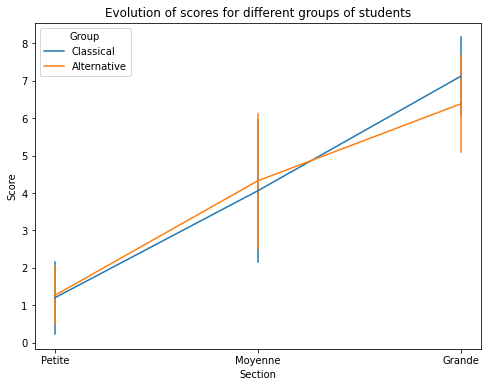

In [5]:
_, ax = plt.subplots(figsize=(8, 6))
# ci='sd' plots standard deviation in seaborn (advanced Python data visualization library)
sns.lineplot(data=df, x="Section", y="Score", hue="Group", err_style="bars", ci='sd', ax=ax)
ax.set_title("Evolution of scores for different groups of students")
plt.legend(loc='upper left', title="Group")
plt.show()

This representation gives an idea of the scores trend and confirms the previous impression (average score is similar in the two groups, slightly lower in *grande* section for the alternative pedagogy). However, the big variance does not allow to fully understand the students' evolution.

A better representation, from the statistical point of view, can be obtained through box plots.

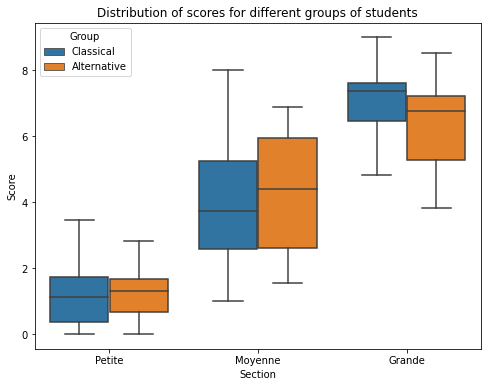

In [6]:
_, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x="Section", y="Score", hue="Group", ax=ax)
ax.set_title("Distribution of scores for different groups of students")
plt.show()

Thanks to this last visualization, one can better understand the distribution of the scores. We can easily conclude that there are no meaningful differences between the scores obtained by students following the two pedagogies.

***

## Foot length/dictation mistakes

### Procedure

Load data (merci guy on the Pad :) ):

In [7]:
data = {17.5: [15, 18, 19, 20], 18: [16, 17, 18, 19], 18.5: [14, 16, 17], 19: [15, 16], 20: [13, 14, 15], 20.5: [12, 13, 14], 21: [10, 11, 13, 15], 21.5: [10, 12, 13], 22: [8, 10, 11, 12], 23: [8, 9, 10], 23.5: [7, 8, 9, 11], 24: [6, 8, 9], 24.5: [6, 7, 8, 10], 25: [4, 6, 7, 8], 25.5: [5, 6], 26: [4, 5, 7], 26.5: [3, 4, 5], 27: [2, 3, 4, 7], 27.5: [2, 3], 28: [0, 1, 2, 4], 28.5: [0, 2], 29: [0, 1, 2]}

Reformat data, in order to load it as Pandas dataframe:

In [8]:
tmp = []
for feet_size in data:
    for mistakes_number in data[feet_size]:
        tmp.append([feet_size, mistakes_number])
df = pd.DataFrame(tmp, columns=["Feet size", "Number of mistakes"])
df.head()

,Feet size,Number of mistakes
0,17.5,15
1,17.5,18
2,17.5,19
3,17.5,20
4,18.0,16


The question to which we want to ask is: is there any important relation between the foot size of students and their number of dictation mistakes? To do so, we start by displaying the data with a scatter plot, considering the feet size as ordinal data:

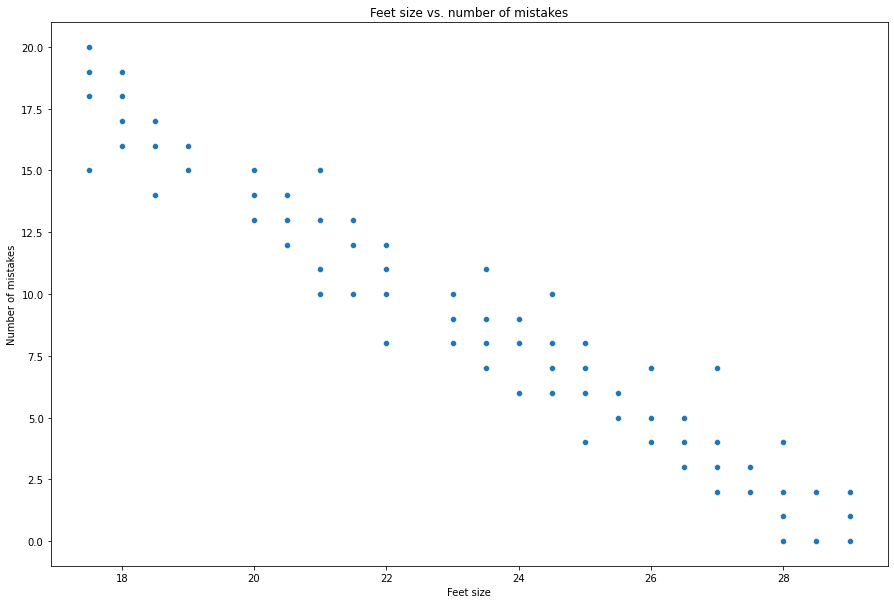

In [9]:
_, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df, x="Feet size", y="Number of mistakes", ax=ax)
ax.set_title("Feet size vs. number of mistakes")
plt.show()

The scatter plot highlights a decreasing trend in the data. It can therefore be summarized through a line plot, displaying the feet size vs. the average number of mistakes. The variance information is also important, as it explains how the results vary for students with the same feet size, and is represented by means of whiskers.

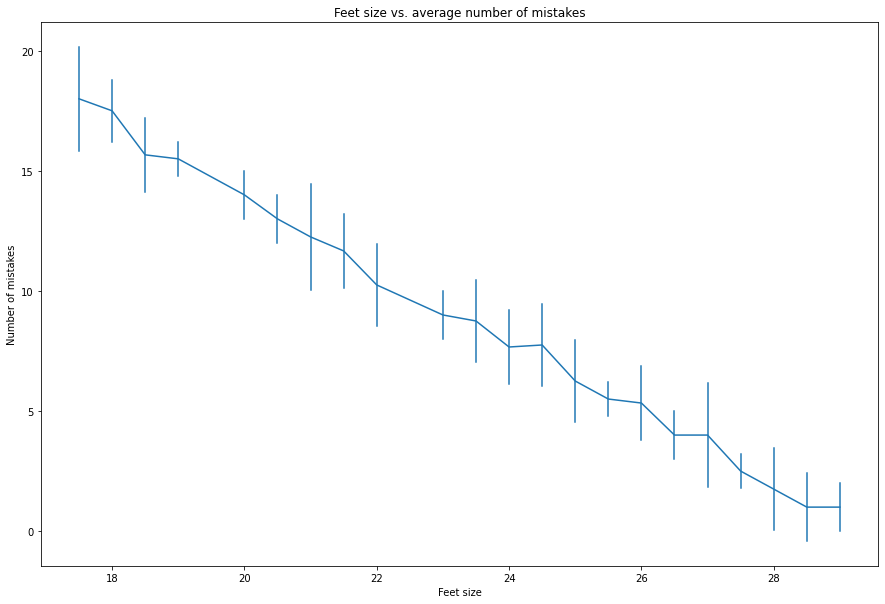

In [10]:
_, ax = plt.subplots(figsize=(15, 10))
# ci='sd' plots standard deviation in seaborn (advanced Python data visualization library)
sns.lineplot(data=df, x="Feet size", y="Number of mistakes", err_style="bars", ci='sd', ax=ax)
ax.set_title("Feet size vs. average number of mistakes")
plt.show()

### Comments

The above graph plots the foot size of the students, against the average number of mistakes made by students with that feet size. For each feet size, the standard deviation of the number of mistakes in the dataset is also represented by means of whiskers (this is done with the parameter `ci='sd'` in [seaborn](http://seaborn.pydata.org/)'s `lineplot`). This summarizes well the available data and gives an idea of the general trend.

Intuitively, there should not be any correlation between the number of errors in dictation made by the students and their foot sizes. One can therefore expect not to see any clear trend. However, the graph shows the opposite: there is a negative correlation between the foot size and the number of mistakes. This suggests that students with larger foot are "smartest" than the ones with shortest foot.

At a first impact, it looks like a case of "spurious correlations", like the ones that can be found on this [website](https://www.tylervigen.com/spurious-correlations), maybe amplified by the small size of the dataset. But, thinking about it a bit more, the trend is obvious and could be expected: students with biggest foot are very likely to be from the upper classes (foot of 28 centimeters corresponds to the European shoe size 45), while students with small foot come from primary education (18 centimeters is shoe size 29)!